##### Assignment 1

Image to use: dog.png

Location: images folder on https://mitu.co.in/dataset

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

##### 1. Load the image and find the following properties:

In [2]:
dog_img = cv2.cvtColor(cv2.imread('images/dog.jpg'), cv2.COLOR_BGR2RGB)

##### 1. Size and Shape of the image

In [3]:
print('Image Size:', dog_img.size)
print('Image Shape:', dog_img.shape)

Image Size: 481200
Image Shape: (400, 401, 3)


##### 2. The color space model

In [4]:
print('Color space:', dog_img.shape[2])

Color space: 3


##### 3. Display using OpenCV and Matplotlib

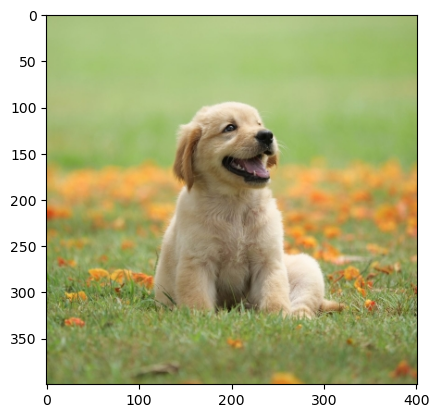

In [5]:
# Matplotlib
plt.imshow(dog_img)

# cv2
cv2.imshow('Dog Image', cv2.cvtColor(dog_img, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2. Show the image in the matrix of 5 x 5 with following colormaps:

`coolwarm, rainbow, tab10, seismic, twilight, turbo, BuGn`

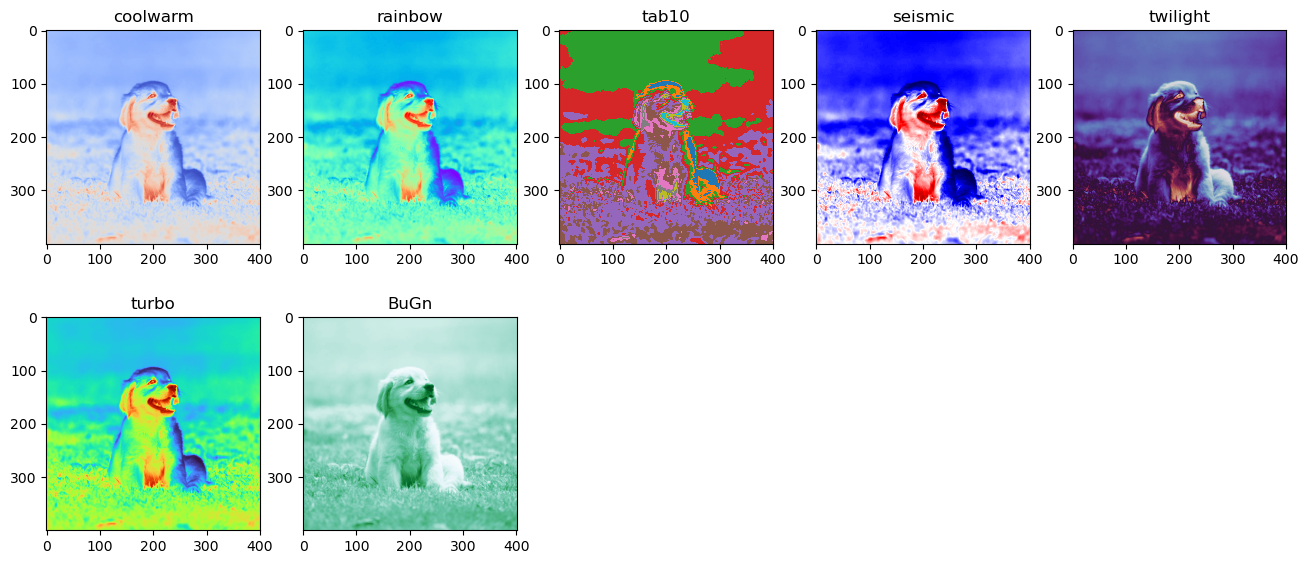

In [6]:
plt.figure(figsize=(16, 18))
plt_colormaps = ['coolwarm', 'rainbow', 'tab10', 'seismic', 'twilight', 'turbo', 'BuGn']
for index, colormap in enumerate(plt_colormaps):
    plt.subplot(5, 5, index + 1)
    plt.title(colormap)
    plt.imshow(cv2.cvtColor(dog_img, cv2.COLOR_RGB2GRAY), cmap=plt.colormaps[colormap].reversed())

#### 3. Change the pixels from (100,150) to (200,350) to white color

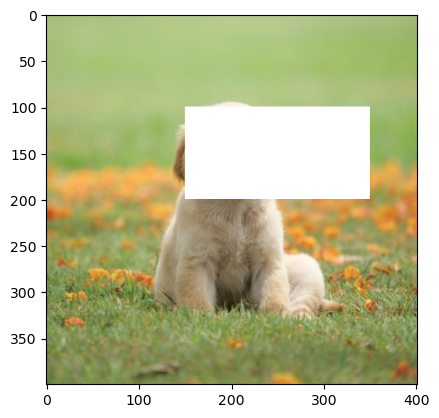

In [7]:
(x1, y1), (x2, y2) = (100, 150), (200, 350)

patch = np.zeros((x2 - x1, y2 - y1, dog_img.shape[2]), dtype=np.uint8) + (0xff, 0xff, 0xff)
dog_img_patched = dog_img.copy()
dog_img_patched[100:200, 150:350] = patch
plt.imshow(dog_img_patched)

#### 4. Download the video robot.mp4

In [8]:
robots_video = cv2.VideoCapture('images/robots.mp4')

##### 1. Find height, width, total frames and fps of the video

In [9]:
robots_video_height = robots_video.get(cv2.CAP_PROP_FRAME_HEIGHT)
robots_video_width = robots_video.get(cv2.CAP_PROP_FRAME_WIDTH)
robots_video_total_frames = robots_video.get(cv2.CAP_PROP_FRAME_COUNT)
robots_video_fps = robots_video.get(cv2.CAP_PROP_FPS)
robots_video_height, robots_video_width, robots_video_total_frames, robots_video_fps

(640.0, 640.0, 1799.0, 30.0)

##### 2. Play the video in frames

In [10]:
robots_video
while True:
    has_next_frame, current_frame = robots_video.read()
    if not has_next_frame:
        break
    cv2.imshow('Video', current_frame)
    if cv2.waitKey(int(1000 / robots_video.get(cv2.CAP_PROP_FPS))) == ord('q'):
        break
cv2.destroyAllWindows()

##### 3. Save the image at 50th second

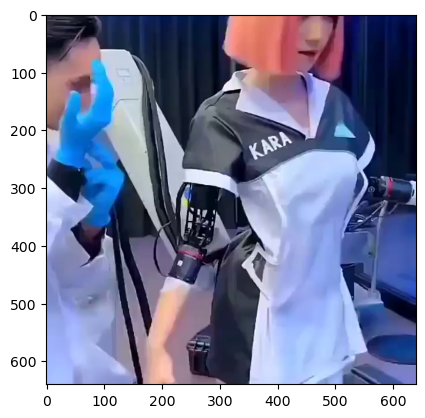

In [11]:
video_timestamp = '00:00:50'
video_timestamp_hours, video_timestamp_minutes, video_timestamp_seconds = list(map(int, video_timestamp.split(':')))

trigger_frame = (video_timestamp_hours * 60 ** 2 + video_timestamp_minutes * 60 ** 1 + video_timestamp_seconds * 60 ** 0) * robots_video_fps
robots_video.set(1, trigger_frame)

_, current_frame = robots_video.read()
current_frame = cv2.cvtColor(current_frame, cv2.COLOR_BGR2RGB)
plt.imshow(current_frame)

#### 5. Apply following transformations on the image

##### 1. Translate the image towards right by 200 and up by 150 pixels

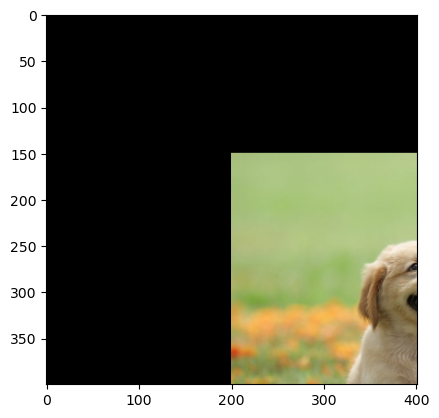

In [12]:
# Define Translation Matrix
translate_x, translate_y = 200, 150
translation_matrix = np.float32([[1, 0, translate_x], [0, 1, translate_y]])
dog_img_translated = cv2.warpAffine(dog_img, translation_matrix, (dog_img.shape[1], dog_img.shape[0]))
plt.imshow(dog_img_translated)

##### 2. Rotate the image 60 degrees anti clockwise

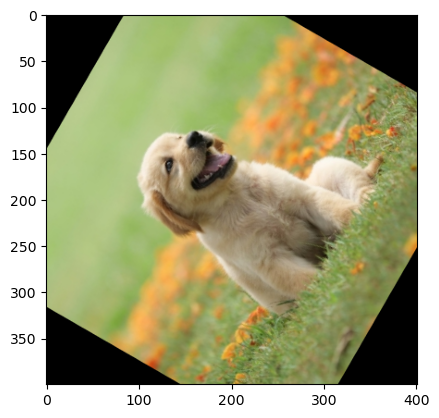

In [13]:
# Define Rotation Matrix
rotation_matrix = cv2.getRotationMatrix2D((dog_img.shape[1] // 2, dog_img.shape[0] //2), 60, 1.0)
dog_img_rotated = cv2.warpAffine(dog_img, rotation_matrix, (dog_img.shape[1], dog_img.shape[0]))
plt.imshow(dog_img_rotated)

##### 3. Resize the image to 75% of original dimensions

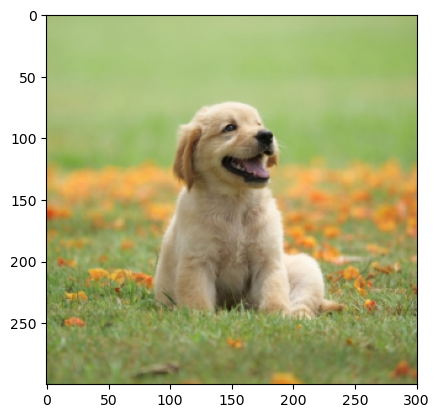

In [14]:
dog_img_resized = cv2.resize(dog_img, None, fx=0.75, fy=0.75)
plt.imshow(dog_img_resized)

##### 4. Flip the image horizontally, diagonally and vertically. Show all four images in the row

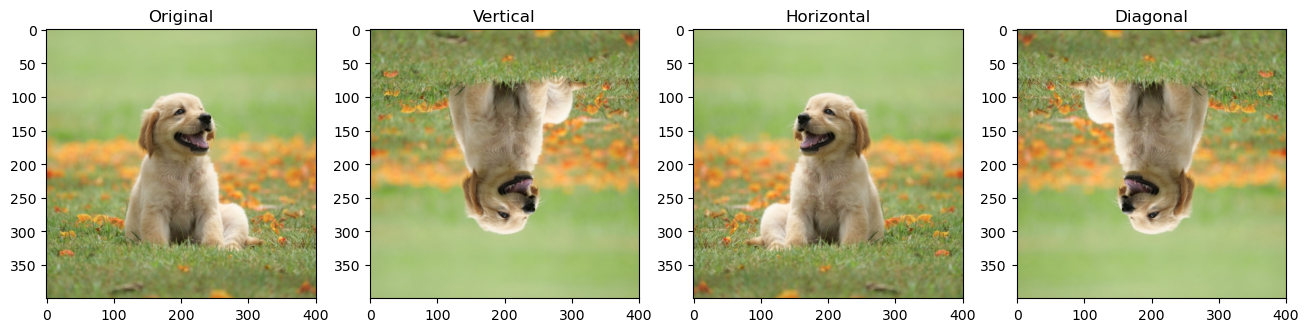

In [15]:
dog_img_flipped_vertically = cv2.flip(dog_img, 0)
dog_img_flipped_horizontally = cv2.flip(dog_img, 1)
dog_img_flipped_diagonally = cv2.flip(dog_img, -1)

plt.figure(figsize=(16, 9))
plt.subplot(1, 4, 1); plt.title('Original'); plt.imshow(dog_img)
plt.subplot(1, 4, 2); plt.title('Vertical'); plt.imshow(dog_img_flipped_vertically)
plt.subplot(1, 4, 3); plt.title('Horizontal'); plt.imshow(dog_img_flipped_horizontally)
plt.subplot(1, 4, 4); plt.title('Diagonal'); plt.imshow(dog_img_flipped_diagonally)

##### 5. Crop the image at, 500,300 to 560, 400 and save in another file

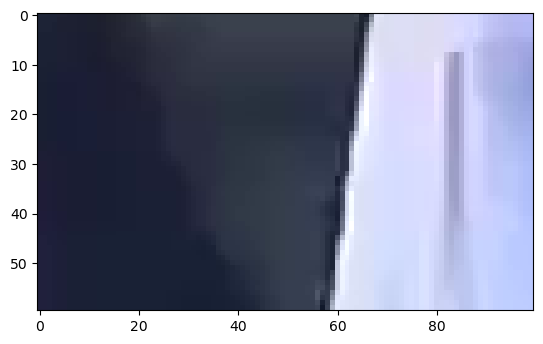

In [16]:
(x1, y1), (x2, y2) = (500, 300), (560, 400)
current_frame_cropped = current_frame[x1:x2, y1:y2]
plt.imshow(current_frame_cropped)
plt.imsave('another file.jpg', current_frame_cropped)

##### 6. Apply the Binary and Otsu Thresholding on image and display as a single image by stacking

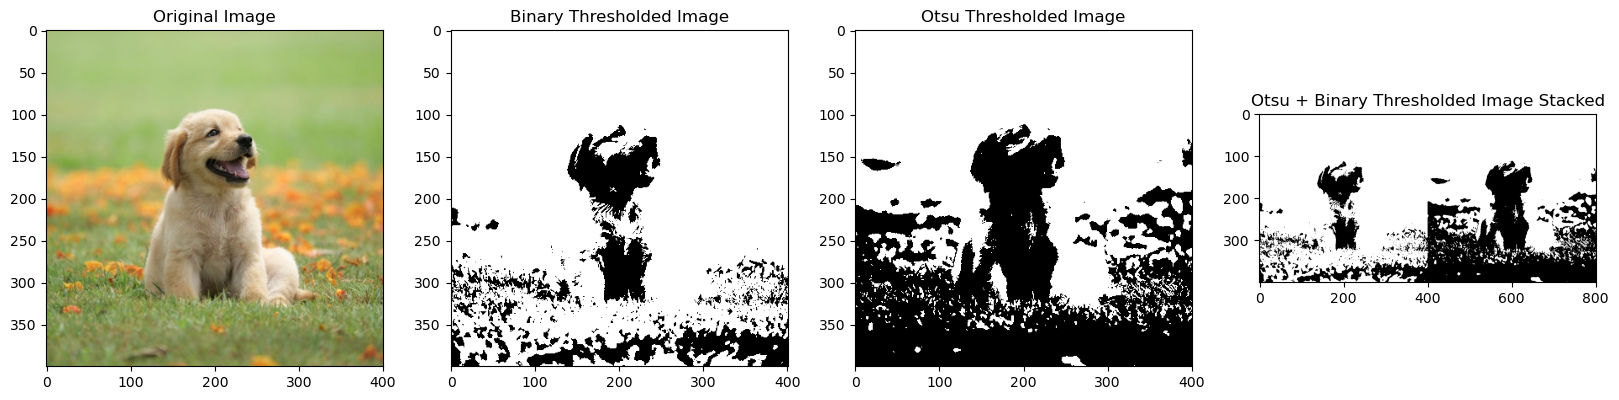

In [17]:
dog_img_bw = cv2.cvtColor(dog_img, cv2.COLOR_RGB2GRAY)
dog_img_bw_binary_img = dog_img_bw > 127
dog_img_bw_binary_img = dog_img_bw_binary_img.astype(np.int8) * 255
dog_img_bw_otsu_thresh, dog_img_bw_otsu_img = cv2.threshold(dog_img_bw, 0, 255, cv2.THRESH_OTSU)
plt.figure(figsize=(20,10))
plt.subplot(1, 4, 1);   plt.title('Original Image');            plt.imshow(dog_img, cmap='Greys_r')
plt.subplot(1, 4, 2);   plt.title('Binary Thresholded Image');            plt.imshow(dog_img_bw_binary_img, cmap='Greys_r')
plt.subplot(1, 4, 3);   plt.title('Otsu Thresholded Image');    plt.imshow(dog_img_bw_otsu_img, cmap='Greys_r')
plt.subplot(1, 4, 4);   plt.title('Otsu + Binary Thresholded Image Stacked');    
# plt.imshow(cv2.add(cv2.cvtColor(cv2.cvtColor(dog_img_bw_binary_img, cv2.COLOR_GRAY2RGB), cv2.COLOR_RGB2GRAY), dog_img_bw_otsu_img), cmap='Greys_r')
# plt.imshow(cv2.add(dog_img_bw_binary_img, dog_img_bw_otsu_img), cmap='Greys_r')
# plt.imshow(dog_img_bw_binary_img, cmap='Greys_r')
plt.imshow(np.concatenate((dog_img_bw_binary_img, dog_img_bw_otsu_img), axis=1), cmap='Greys_r')
# dog_img_bw_binary_img, dog_img_bw_otsu_img


##### 7. Shear the image in Y-direction by 25%

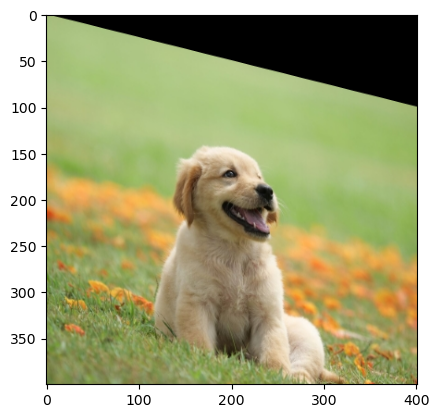

In [18]:
sheared_matrix = np .float32([
    [1,     0,   0],
    [0.25,  1,      0],
    [0,     0,      1]])

dog_img_sheared = cv2.warpPerspective(dog_img, sheared_matrix, (dog_img.shape[1], dog_img.shape[0]))
plt.imshow(dog_img_sheared)

#### 6. Perform Sobel, Scharr and Canny edge detection algorithm on it. Show all the images at once

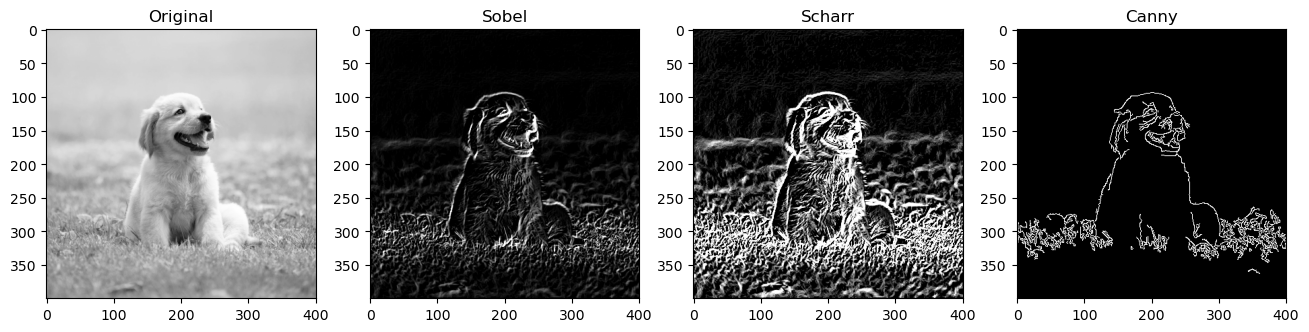

In [19]:
# Sobel
dog_img_bw_sobelx = cv2.Sobel(dog_img_bw, None, 1, 0, 3)
dog_img_bw_sobely = cv2.Sobel(dog_img_bw, None, 0, 1, 3)

dog_img_bw_sobel_combined = cv2.add(dog_img_bw_sobelx, dog_img_bw_sobely)
plt.figure(figsize=(16, 9))
plt.subplot(1, 4, 1);   plt.title('Original');  plt.imshow(dog_img_bw, cmap='Greys_r')
plt.subplot(1, 4, 2);   plt.title('Sobel');     plt.imshow(dog_img_bw_sobel_combined, cmap='Greys_r')

# Scharr
dog_img_bw_scharrx = cv2.Scharr(dog_img_bw, None, 1, 0)
dog_img_bw_scharry = cv2.Scharr(dog_img_bw, None, 0, 1)
dog_img_bw_scharr_combined = cv2.bitwise_or(dog_img_bw_scharrx, dog_img_bw_scharry)
plt.subplot(1, 4, 3);   plt.title('Scharr');    plt.imshow(dog_img_bw_scharr_combined, cmap='Greys_r')

# Canny
dog_img_bw_canny = cv2.Canny(dog_img_bw, 64, 255)
plt.subplot(1, 4, 4);   plt.title('Canny');     plt.imshow(dog_img_bw_canny, cmap='Greys_r')

#### 7. Draw the histogram for this image

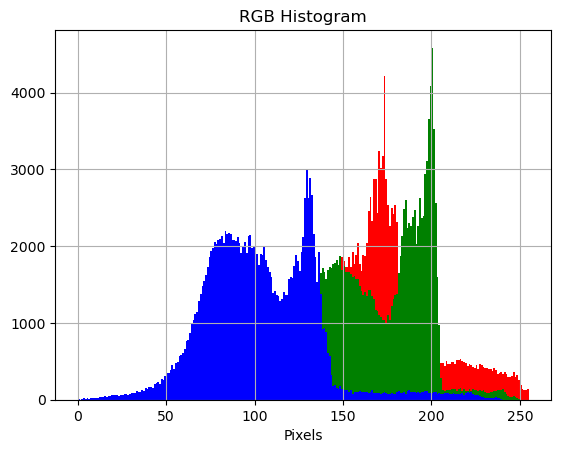

In [20]:
dog_img_red, dog_img_green, dog_img_blue = cv2.split(dog_img)

plt.title('RGB Histogram')
plt.grid()
plt.xlabel('Pixels')
plt.hist(dog_img_red.flatten(), bins=range(0, 256), color='r')
plt.hist(dog_img_green.flatten(), bins=range(0, 256), color='g')
plt.hist(dog_img_blue.flatten(), bins=range(0, 256), color='b'); 

#### 8. Apply the Averaging, Median and Gaussian blurring on it and display all images in single screen

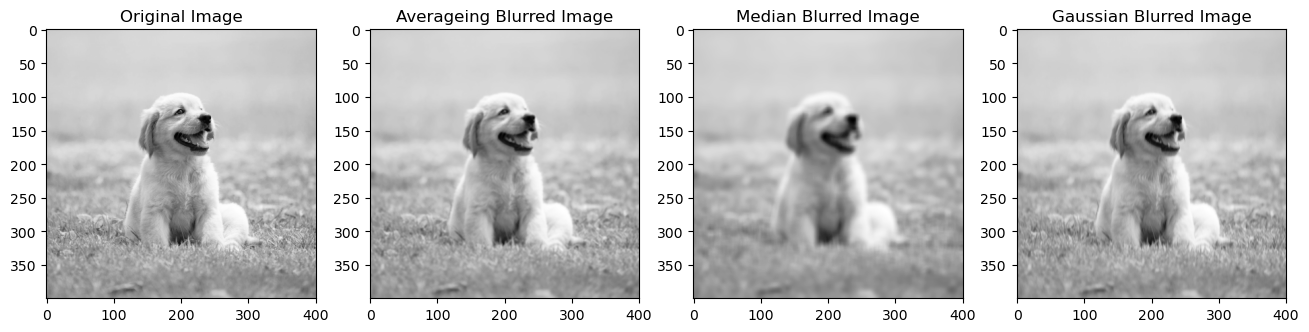

In [21]:
# Averaging Blur
averaging_kernel = np.ones((3, 3), dtype=np.float32) / 9

dog_img_bw_average_blur = cv2.filter2D(dog_img_bw, -100, averaging_kernel)
plt.figure(figsize=(16, 9))
plt.subplot(1, 4, 1); plt.title('Original Image'); plt.imshow(dog_img_bw, cmap='Greys_r')
plt.subplot(1, 4, 2); plt.title('Averageing Blurred Image'); plt.imshow(dog_img_bw_average_blur, cmap='Greys_r')

# Median Blur
median_kernel = np.ones((9, 9), dtype=np.float32) / 81
dog_img_bw_median_blur = cv2.filter2D(dog_img_bw, -1, median_kernel)
plt.subplot(1, 4, 3); plt.title('Median Blurred Image'); plt.imshow(dog_img_bw_median_blur, cmap='Greys_r')

# Gaussian Blur
gaussian_kernel = cv2.getGaussianKernel(20, 1.34)
dog_img_bw_gaussian_blur = cv2.filter2D(dog_img_bw, -1, gaussian_kernel)
plt.subplot(1, 4, 4); plt.title('Gaussian Blurred Image'); plt.imshow(dog_img_bw_gaussian_blur, cmap='Greys_r')